In [ ]:
import cv2
import uuid

output_directory='collected_frames_pt2/yes'

video = cv2.VideoCapture(0)
fps = int(video.get(cv2.CAP_PROP_FPS))

# Calculate the frame interval to capture every 4 seconds
frame_interval = fps * 1  # Number of frames to skip
frame_count = 0  # Initialize total frame counter
saved_frame_count = 0  # Counter for saved frames

while saved_frame_count<100:
    ret, frame = video.read()
    if not ret:
        print("Failed to grab frame")
        break
    
    cv2.imshow('Frame', frame)
    if frame_count % frame_interval == 0:
        unique_filename = f"{uuid.uuid4()}"
        cv2.imwrite(f"{output_directory}/{unique_filename}.jpg", frame)
        saved_frame_count += 1
        print('next', saved_frame_count)
        
    frame_count += 1

video.release()
cv2.destroyAllWindows()

next 1
next 2
next 3
next 4
next 5
next 6
next 7
next 8
next 9
next 10
next 11
next 12
next 13
next 14
next 15
next 16
next 17
next 18
next 19
next 20
next 21
next 22
next 23
next 24
next 25
next 26
next 27
next 28
next 29
next 30
next 31
next 32
next 33
next 34
next 35
next 36
next 37
next 38
next 39
next 40
next 41
next 42
next 43
next 44
next 45
next 46
next 47
next 48
next 49
next 50
next 51
next 52
next 53
next 54
next 55
next 56
next 57
next 58
next 59
next 60
next 61
next 62
next 63
next 64
next 65
next 66
next 67
next 68
next 69
next 70
next 71
next 72
next 73
next 74
next 75
next 76
next 77
next 78
next 79
next 80
next 81
next 82
next 83
next 84
next 85
next 86
next 87
next 88


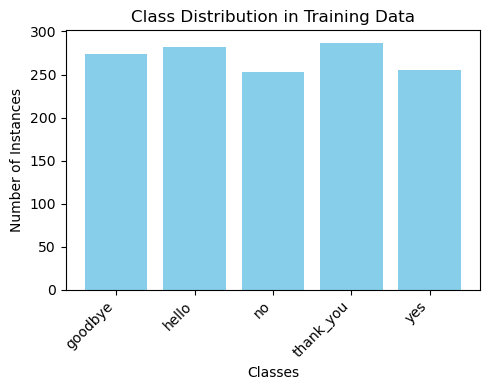

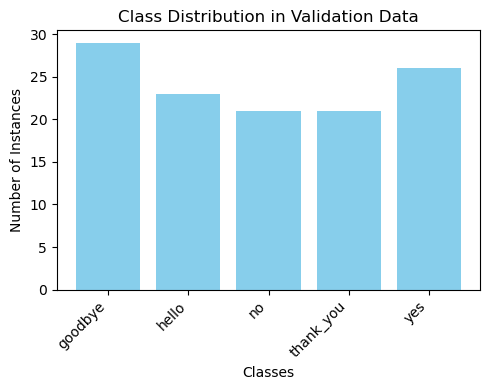

In [3]:
import yaml
import matplotlib.pyplot as plt
from collections import Counter
import os

# Load your data.yaml file
data_yaml_path = "dataset/data.yaml"  # Update this path
with open(data_yaml_path, 'r') as file:
    data_config = yaml.safe_load(file)

# Paths to dataset
train_images_path = data_config['train']  # Path to training images
val_images_path = data_config['val']  # Path to validation images

# Function to count classes from label files
def count_classes(label_folder):
    class_counts = Counter()
    for label_file in os.listdir(label_folder):
        if label_file.endswith('.txt'):
            with open(os.path.join(label_folder, label_file), 'r') as file:
                for line in file:
                    class_id = int(line.split()[0])  # The first value in YOLO labels is the class ID
                    class_counts[class_id] += 1
    return class_counts

# Count classes in train and validation sets
# train_label_folder = train_images_path.replace("images", "labels")  # Adjust paths if needed
# val_label_folder = val_images_path.replace("images", "labels")  # Adjust paths if needed
train_label_folder = "dataset/train/labels"  # Adjust paths if needed
val_label_folder = 'dataset/valid/labels'  # Adjust paths if needed
val_label_folder = 'dataset/test/labels'  # Adjust paths if needed

train_counts = count_classes(train_label_folder)
val_counts = count_classes(val_label_folder)

# Load class names from data.yaml
class_names = data_config['names']

# Plotting function
def plot_class_distribution(counts, class_names, title):
    sorted_counts = dict(sorted(counts.items()))
    labels = [class_names[i] for i in sorted_counts.keys()]
    values = list(sorted_counts.values())

    plt.figure(figsize=(5, 4))
    plt.bar(labels, values, color='skyblue')
    plt.xlabel('Classes')
    plt.ylabel('Number of Instances')
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plot distributions
plot_class_distribution(train_counts, class_names, "Class Distribution in Training Data")
plot_class_distribution(val_counts, class_names, "Class Distribution in Validation Data")